# **CSB352: Data Mining LAB**

# *LAB 6: Exploratory Data Analysis*

#### 2.0.1 CASE STUDY 1: [EDA] on Titanic Dataset

#### 2.0.2 Feature Engineering in ML

  Data Visualization
• Data Pre-processing
• Dimension Reduction :
• Feature Extraction :
• Feature Selection

### 3 Tabular data Pre-processing

#### Problem Statement :

Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.
for more detail visit : [https://www.kaggle.com/c/titanic/overview ]

In [1]:
#Currently using Jupyter Notebook
try:
  from google.colab import drive
  %tensorflow_version 2.x
  COLAB = True
  print("Hello World")
  print("Note: using Google CoLab")
except:
  print("Hello NITD")
  print("Note: not using Google CoLab")
  COLAB = False

# Print your name and Roll No.
print("Name: Rohit byas")
print("Roll Number: 181210043")
from datetime import datetime

# datetime object containing current date and time
now = datetime.now()
 
print("now =", now)

# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("date and time =", dt_string)

Hello World
Note: using Google CoLab
Name: Rohit byas
Roll Number: 181210043
now = 2021-02-08 09:00:21.820198
date and time = 08/02/2021 09:00:21


### 3.1 Data reading and setup

In [2]:

!gdown --id 18tm2ylYJs8m5W2xYzCUVYcFdugbQo5KV
!gdown --id 1IZ6bhCi-JLLW9vxKtRaSYNRE7OAlOFzf

Downloading...
From: https://drive.google.com/uc?id=18tm2ylYJs8m5W2xYzCUVYcFdugbQo5KV
To: /content/train.csv
100% 61.2k/61.2k [00:00<00:00, 22.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1IZ6bhCi-JLLW9vxKtRaSYNRE7OAlOFzf
To: /content/test.csv
100% 28.6k/28.6k [00:00<00:00, 51.2MB/s]


In [3]:
### Titanic Dataset

import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

from matplotlib import pyplot as plt
from matplotlib import style
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [4]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

Spend some time with data

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB




Features from Dataset - survival: Survival [0 = No, 1 = Yes] - PassengerId: Unique Id of a
passenger. - pclass: Ticket class [ 1 = 1st, 2 = 2nd, 3 = 3rd]
- Sex: Gender ( male /female)
- Age: Age in years
- sibsp: # of siblings / spouses aboard the Titanic
- parch: # of parents / children aboard the Titanic
- ticket: Ticket number
- fare: Passenger fare
- cabin: Cabin number
- embarked: Port of Embarkation - [C = Cherbourg, Q = Queenstown, S = Southampton]


In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


• Catogrical Values
• Different scale of numeric data
• Missing values

3.1.1 Missing Values

In [7]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


### 4 EDA : Exploratory Data Analysis

Exploratory Data Analysis refers to the critical process of performing initial investigations on data
so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the
help of summary statistics and graphical representations[]


#### Age vs Sex vs Survival

In [8]:
# Seaborn is a library that uses Matplotlib underneath to plot graphs.
# It is used to create more attractive and informative statistical graphics

import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

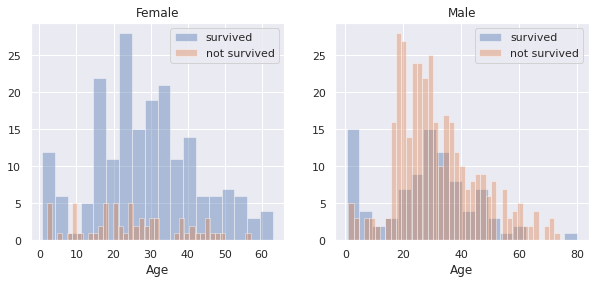

In [9]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']

ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label =survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label =not_survived, ax = axes[0], kde =False)

ax.legend()

ax.set_title('Female')

ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label =survived, ax = axes[1], kde = False)

ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label =not_survived, ax = axes[1], kde = False)

ax.legend()
_ = ax.set_title('Male')

**observation**: Through this plots we can clearly say that people belonging to female categories have higher chances of survival then male  

#### Embarked vs Pclass vs Sex

“FacetGrid class helps in visualizing distribution of one variable as well as the relationship between
multiple variables separately within subsets of your dataset using multiple panels.”


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


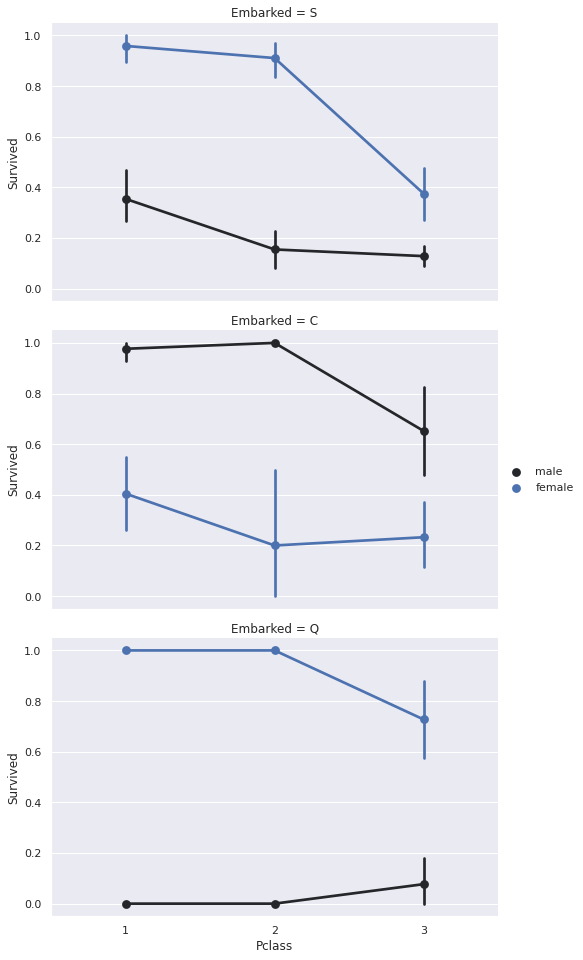

In [10]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)

FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,order=None, hue_order=None )
FacetGrid.add_legend()

#### Pclass

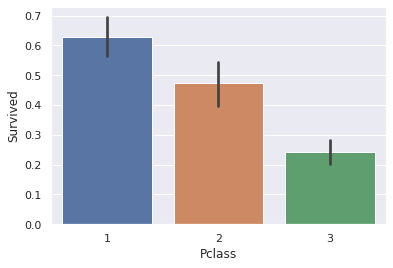

In [11]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


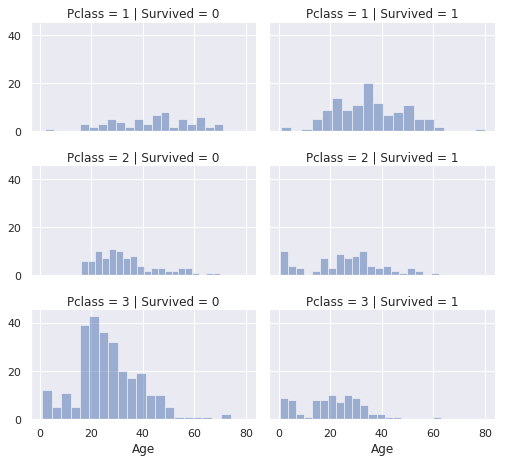

In [12]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)

grid.map(plt.hist, 'Age', alpha=.5, bins=20)

grid.add_legend();

**observation**: Through this plots we can clearly say that people belonging to 1st class have been given priority then 2nd or 3rd class and also people which belong to 20-30 years of age  have higher chances of survival then others.  

#### SibSp and Parch (also some feature engg)

sibsp: # no. of siblings / spouses aboard the Titanic
parch: # of parents / children aboard the Titanic

In [13]:
data = [train_df, test_df]

for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)

In [14]:
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


#### No of people alone or not

In [15]:
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


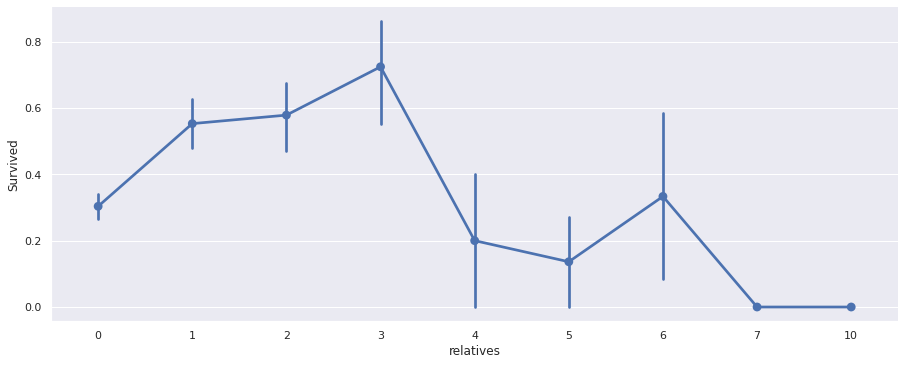

In [16]:
axes = sns.factorplot('relatives','Survived',
                       data=train_df, aspect = 2.5, )

**observation**: If there are 2 to 3 number of people are more belonging to same family , then they have higher chances of survival. As size increases the chance of survial is decreased.

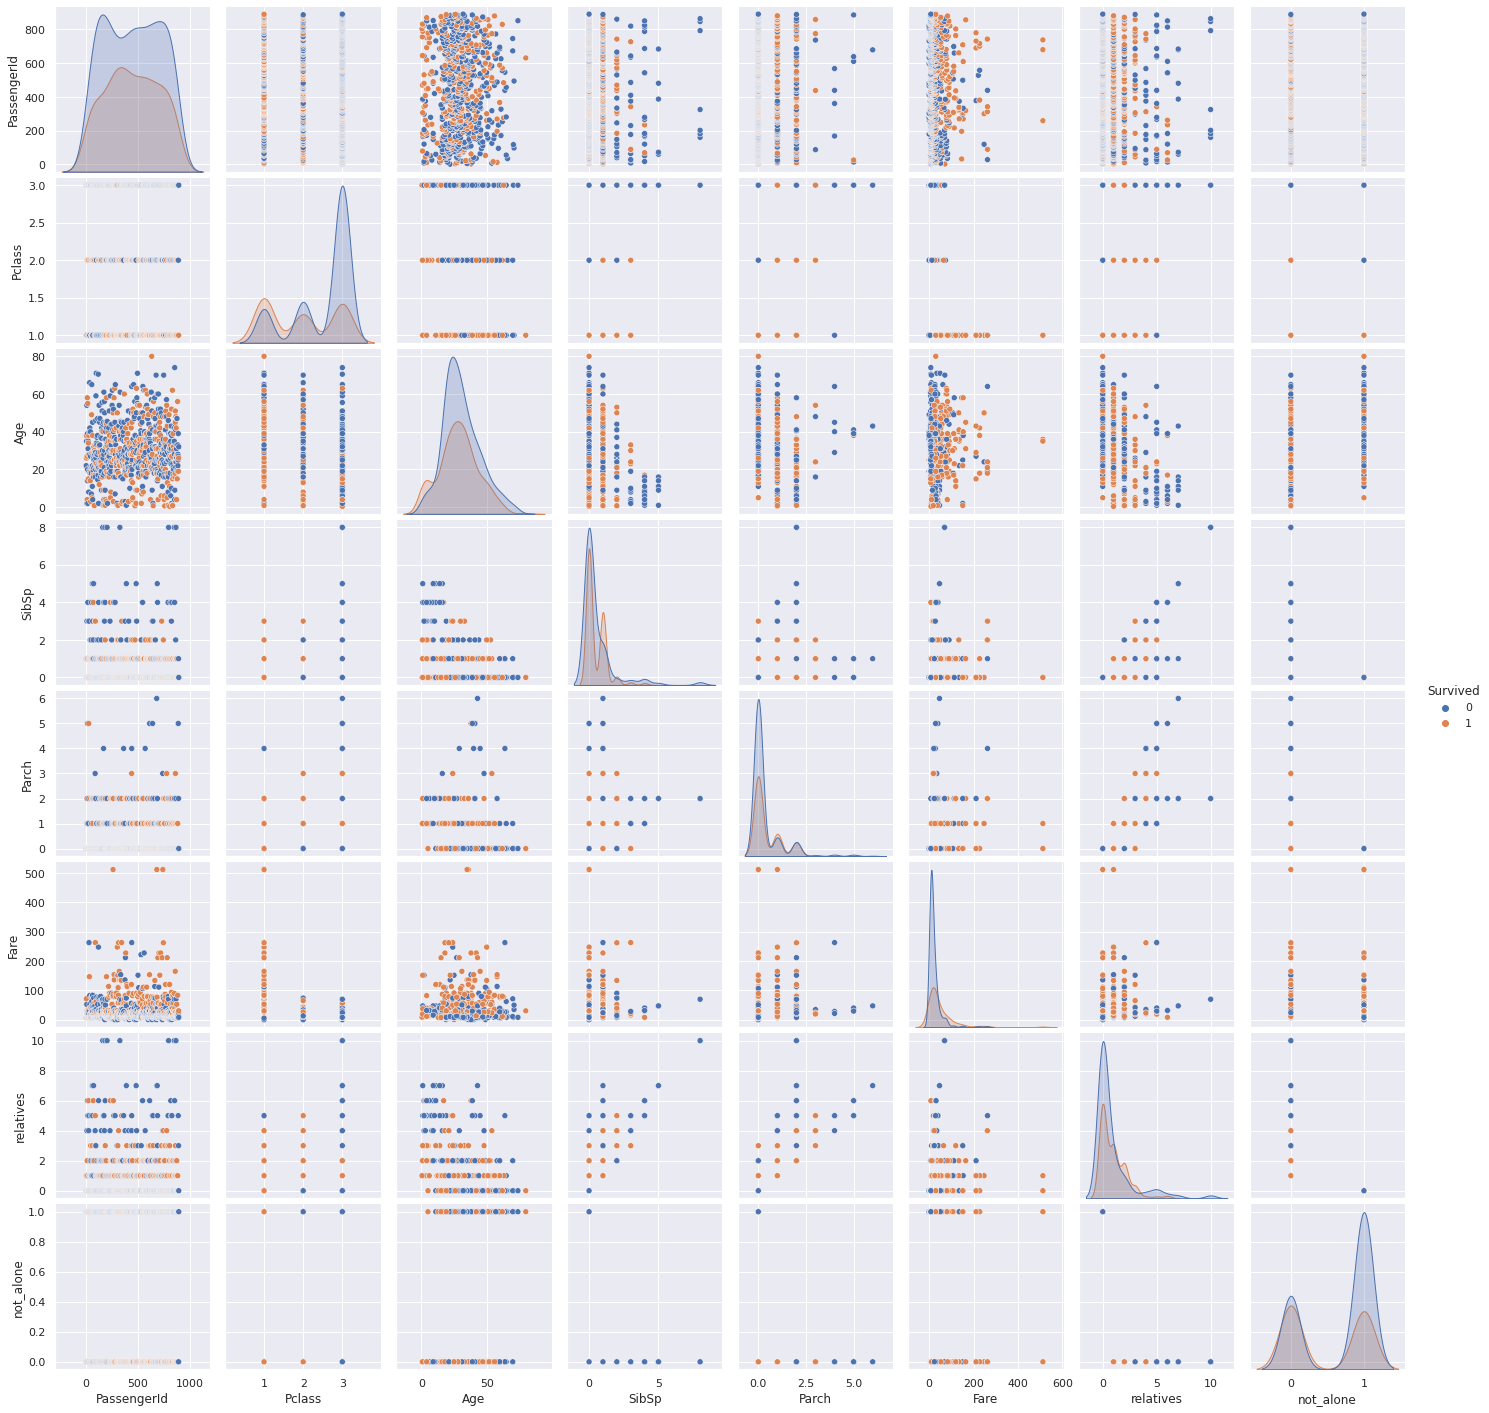

In [17]:
# df_train_drop = train_df.dropna()

# sns.pairplot(df_train_drop, hue='Survived');

sns.pairplot(train_df, hue='Survived');

**observation**: All the attributes are plotted, we can see that passenger_id having values between 0-700 where the passenger are survived, pclass=1 people are survived, higher the fair more the survival chance.

### 5 Data preprocessing and Feature Engg

#### Drop passenger ID

In [18]:
train_df = train_df.drop(['PassengerId'], axis=1)

In [19]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,0
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1


Fix cabin


In [20]:
train_df['Cabin'].describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

In [21]:
train_df['Cabin'] 

#looks like the cabin number - lets convert to deck

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [22]:
import re

deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
    
# we can now drop the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [23]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,8


#### Fix Age

Lets get the mean,std of age and creat random ages in the range

In [24]:
train_df["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [25]:
# Fill the null values

In [26]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()

    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)

    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
train_df["Age"].isnull().sum()

0

In [27]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,1,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,1,0,3
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,0,1,8


Fix Embarked -

In [28]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [29]:
# only 3 missing so lets do most common

common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

### 5.1 Converting Features

Fare - convert to int

In [30]:
dataset['Fare']

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

In [31]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [32]:
dataset['Fare']

0        7
1        7
2        9
3        8
4       12
      ... 
413      8
414    108
415      7
416      8
417     22
Name: Fare, Length: 418, dtype: int64

Name - Extract Titles from name

In [33]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt','Col','Don', 'Dr',\
                       'Major', 'Rev', 'Sir', 'Jonkheer','Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)

    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)

train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [34]:
dataset['Title']


0      1
1      3
2      1
3      1
4      3
      ..
413    1
414    5
415    1
416    1
417    4
Name: Title, Length: 418, dtype: int64

In [35]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,male,22,1,0,A/5 21171,7,S,1,0,8,1
1,1,1,female,38,1,0,PC 17599,71,C,1,0,3,3
2,1,3,female,26,0,0,STON/O2. 3101282,7,S,0,1,8,2
3,1,1,female,35,1,0,113803,53,S,1,0,3,3
4,0,3,male,35,0,0,373450,8,S,0,1,8,1


Sex to numeric

In [36]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

Ticket

In [37]:
 train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

too many unique values…lets drop it

In [38]:
train_df = train_df.drop(['Ticket'], axis=1)

test_df = test_df.drop(['Ticket'], axis=1)

Embarked

In [39]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)


### 5.2 Creating Categories

Age - convert into buckets… be carefull that number of samples in each class should be kinda equal

In [40]:
data = [train_df, test_df]

for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 7

In [41]:
 train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,7,0,1,0,8,1
1,1,1,1,5,1,0,71,1,1,0,3,3
2,1,3,1,3,0,0,7,0,0,1,8,2
3,1,1,1,5,1,0,53,0,1,0,3,3
4,0,3,0,5,0,0,8,0,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,3,0,0,13,0,0,1,8,5
887,1,1,1,2,0,0,30,0,0,1,2,2
888,0,3,1,2,1,2,23,0,3,0,8,2
889,1,1,0,3,0,0,30,1,0,1,3,1


In [42]:
train_df['Age'].value_counts()

4    163
6    153
5    150
3    141
2    112
1     97
0     68
7      7
Name: Age, dtype: int64

Fare

In [43]:
data = [train_df, test_df]
for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare'] = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare'] = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)


### 5.3 Creating new features

Age time class since we saw a affect of both on surviving

In [44]:
data = [train_df, test_df]

for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']


Fare per person in family - is a indication of number of people and which class

In [45]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

## 6 Building ML models

In [46]:
## Create Train, and Test

X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId", axis=1).copy()